In [1]:
import ROOT
c=ROOT.TCanvas()
import pandas as pd
import numpy as np
# Get all target polarizations from RCDB
import sys
sys.path.append("/work/clas12/users/gmat/packages/clas12root/rcdb/python/")
import rcdb
from rcdb.provider import RCDBProvider
from rcdb.model import ConditionType
from scipy.optimize import curve_fit
db = RCDBProvider("mysql://rcdb@clasdb/rcdb")

import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-x782qouv because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def get_from_rcdb(run,param):
    r = db.get_run(run)
    cnd = r.get_condition(param)
    return cnd.value

In [17]:
df = pd.read_csv("/work/clas12/users/gmat/CLAS12Analysis/util/runHelicityCounts8.3.2.csv")

In [18]:
def get_fcup(run):
    scaler_dir="/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-scaler8.3.2/run{}_HELScaler-all.csv".format(run)
    df_hel = pd.read_csv(scaler_dir)
    return df_hel.fcupgated_33ms.sum()

In [24]:
x=[]
y1=[]
y2=[]
y3=[]
y4=[]
targ=[]
for index, row in df.iterrows():
    x.append(row.Run)
    y1.append(row.npos_recon+row.nneg_recon+row.nzero_recon)
    y2.append(get_from_rcdb(row.Run,"event_count"))
    y3.append(row.npos_train+row.nneg_train+row.nzero_train)
    targ.append(get_from_rcdb(row.Run,"target"))
    y4.append(get_fcup(row.Run))
x=np.array(x)
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)

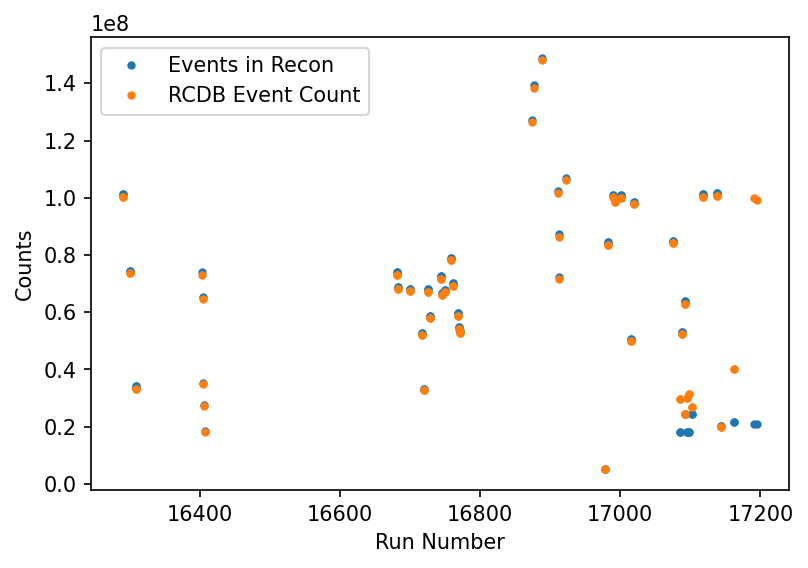

In [5]:
plt.figure(dpi=150)
plt.plot(x,y1,".",label="Events in Recon")
plt.plot(x,y2,".",label="RCDB Event Count")
plt.xlabel("Run Number")
plt.ylabel("Counts")
plt.legend()

In [6]:
import glob
voldir="/volatile/clas12/rg-c/production/ana_data/*/8.3.2/dst/train/sidisdvcs/*"

In [7]:
files=glob.glob(voldir)
isHBT=[]
isTBT=[]
isNeither=[]
actuallyTBT=[16408, 16414, 16421, 16424, 16659, 16665, 16671, 16674, 16676, 16679,
16682, 16685, 16688, 16692, 16709, 16710, 16711, 16712, 16713, 16715,
16719, 16723, 16727, 16729, 16730, 16732, 16736, 16742, 16743, 16748,
16752]
actuallyTBT=[]
cooks=[]
for run in x:
    cookType="Neither"
    if(run in actuallyTBT):
        isHBT.append(False)
        isTBT.append(True)
        isNeither.append(False)
        cooks.append("TBT")
        continue
    for f in files:
        if("/HBT/" in f and str(run) in f):
            cookType="HBT"
            break
        if("/TBT/" in f and str(run) in f):
            cookType="TBT"
            break
    if(cookType=="HBT"):
        isHBT.append(True)
        isTBT.append(False)
        isNeither.append(False)
        cooks.append("HBT")
    elif(cookType=="TBT"):
        isHBT.append(False)
        isTBT.append(True)
        isNeither.append(False)
        cooks.append("TBT")
    else:
        isHBT.append(False)
        isTBT.append(False)
        isNeither.append(True)
        cooks.append("N/A")

Text(0, 0.5, 'Recon Counts/RCDB Counts')

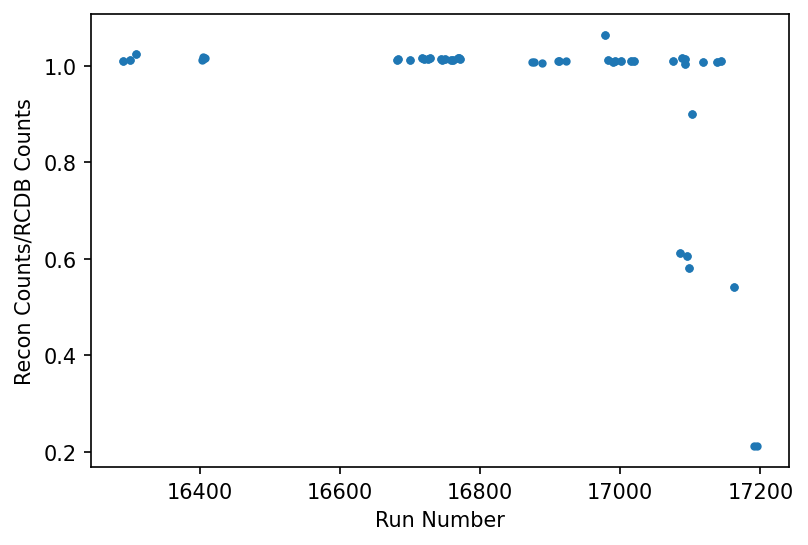

In [8]:
plt.figure(dpi=150)
plt.plot(x,np.array(y1)/np.array(y2),".")
plt.xlabel("Run Number")
plt.ylabel("Recon Counts/RCDB Counts")

Text(0, 0.5, 'Recon Counts/RCDB Counts')

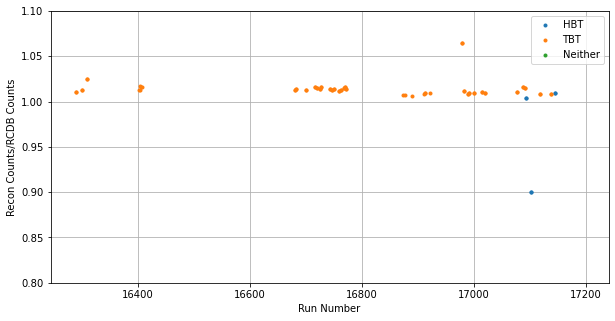

In [9]:
plt.figure(figsize=(10,5))
plt.plot(x[isHBT],np.array(y1[isHBT])/np.array(y2[isHBT]),".",label="HBT")
plt.plot(x[isTBT],np.array(y1[isTBT])/np.array(y2[isTBT]),".",label="TBT")
plt.plot(x[isNeither],np.array(y1[isNeither])/np.array(y2[isNeither]),".",label="Neither")
plt.legend()
plt.ylim(0.8,1.1)
plt.grid()
plt.xlabel("Run Number")
plt.ylabel("Recon Counts/RCDB Counts")

Text(0, 0.5, 'RCDB Counts/Fcup Integrated')

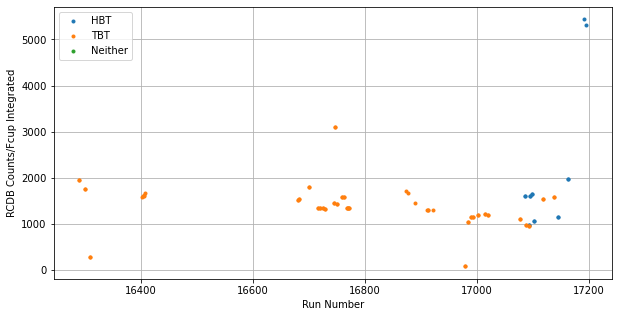

In [26]:
plt.figure(figsize=(10,5))
plt.plot(x[isHBT],np.array(y2[isHBT])/np.array(y4[isHBT]),".",label="HBT")
plt.plot(x[isTBT],np.array(y2[isTBT])/np.array(y4[isTBT]),".",label="TBT")
plt.plot(x[isNeither],np.array(y2[isNeither])/np.array(y4[isNeither]),".",label="Neither")
plt.legend()
plt.grid()
plt.xlabel("Run Number")
plt.ylabel("RCDB Counts/Fcup Integrated")

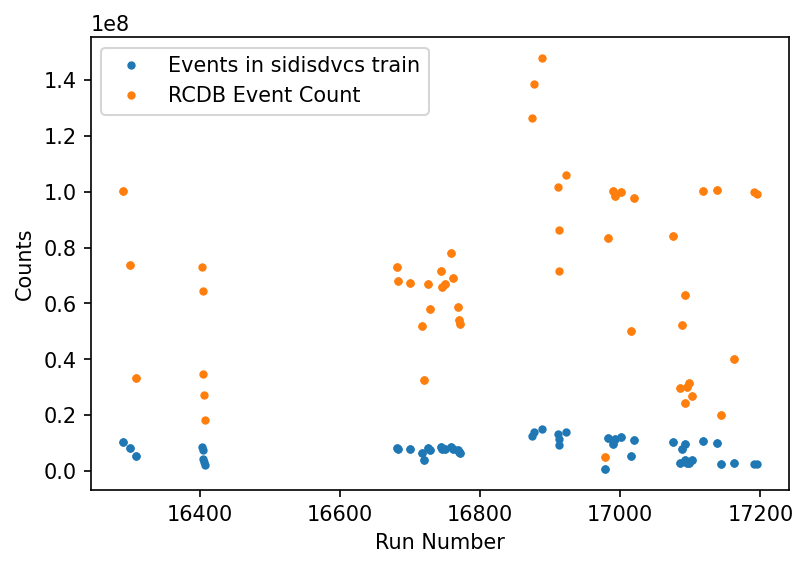

In [10]:
plt.figure(dpi=150)
plt.plot(x,y3,".",label="Events in sidisdvcs train")
plt.plot(x,y2,".",label="RCDB Event Count")
plt.xlabel("Run Number")
plt.ylabel("Counts")
plt.legend()

Text(0, 0.5, 'SIDIS DVCS Train Counts/RCDB Counts')

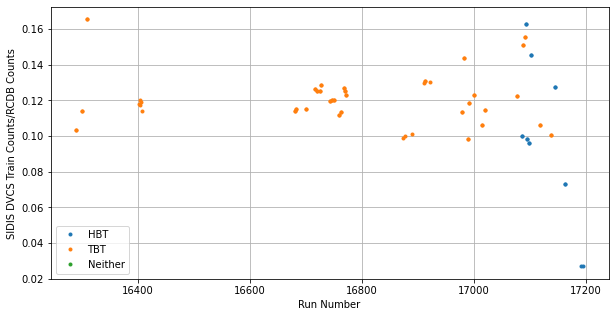

In [11]:
plt.figure(figsize=(10,5))
plt.plot(x[isHBT],np.array(y3[isHBT])/np.array(y2[isHBT]),".",label="HBT")
plt.plot(x[isTBT],np.array(y3[isTBT])/np.array(y2[isTBT]),".",label="TBT")
plt.plot(x[isNeither],np.array(y3[isNeither])/np.array(y2[isNeither]),".",label="Neither")
plt.legend()
#plt.ylim(0.8,1.1)
plt.grid()
plt.xlabel("Run Number")
plt.ylabel("SIDIS DVCS Train Counts/RCDB Counts")

Text(0, 0.5, 'SIDIS DVCS Train Counts/RCDB Counts')

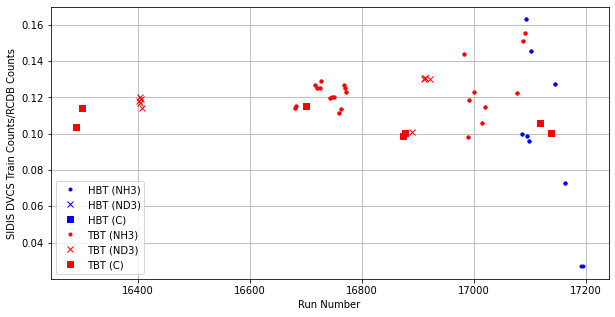

In [12]:
isNH3=['NH3' in b for b in targ]
isND3=['ND3' in b for b in targ]
isC=['C' in b for b in targ]
plt.figure(figsize=(10,5))
plt.plot(x[np.array(isHBT) * np.array(isNH3)],np.array(y3[np.array(isHBT) * np.array(isNH3)])/np.array(y2[np.array(isHBT) * np.array(isNH3)]),".b",label="HBT (NH3)")
plt.plot(x[np.array(isHBT) * np.array(isND3)],np.array(y3[np.array(isHBT) * np.array(isND3)])/np.array(y2[np.array(isHBT) * np.array(isND3)]),"xb",label="HBT (ND3)")
plt.plot(x[np.array(isHBT) * np.array(isC)],np.array(y3[np.array(isHBT) * np.array(isC)])/np.array(y2[np.array(isHBT) * np.array(isC)]),"sb",label="HBT (C)")
plt.plot(x[np.array(isTBT) * np.array(isNH3)],np.array(y3[np.array(isTBT) * np.array(isNH3)])/np.array(y2[np.array(isTBT) * np.array(isNH3)]),".r",label="TBT (NH3)")
plt.plot(x[np.array(isTBT) * np.array(isND3)],np.array(y3[np.array(isTBT) * np.array(isND3)])/np.array(y2[np.array(isTBT) * np.array(isND3)]),"xr",label="TBT (ND3)")
plt.plot(x[np.array(isTBT) * np.array(isC)],np.array(y3[np.array(isTBT) * np.array(isC)])/np.array(y2[np.array(isTBT) * np.array(isC)]),"sr",label="TBT (C)")

plt.legend()
#plt.ylim(0.8,1.1)
plt.grid()
plt.xlabel("Run Number")
plt.ylabel("SIDIS DVCS Train Counts/RCDB Counts")

Text(0, 0.5, 'Recon Counts/RCDB Counts')

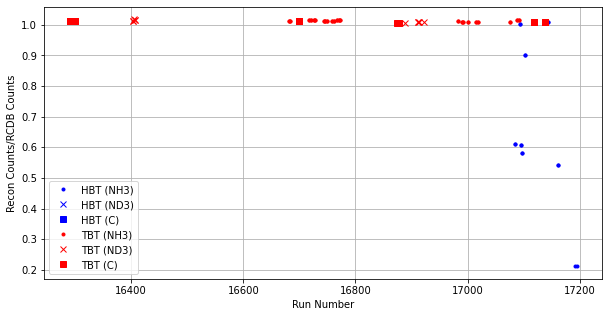

In [13]:
isNH3=['NH3' in b for b in targ]
isND3=['ND3' in b for b in targ]
isC=['C' in b for b in targ]
plt.figure(figsize=(10,5))
plt.plot(x[np.array(isHBT) * np.array(isNH3)],np.array(y1[np.array(isHBT) * np.array(isNH3)])/np.array(y2[np.array(isHBT) * np.array(isNH3)]),".b",label="HBT (NH3)")
plt.plot(x[np.array(isHBT) * np.array(isND3)],np.array(y1[np.array(isHBT) * np.array(isND3)])/np.array(y2[np.array(isHBT) * np.array(isND3)]),"xb",label="HBT (ND3)")
plt.plot(x[np.array(isHBT) * np.array(isC)],np.array(y1[np.array(isHBT) * np.array(isC)])/np.array(y2[np.array(isHBT) * np.array(isC)]),"sb",label="HBT (C)")
plt.plot(x[np.array(isTBT) * np.array(isNH3)],np.array(y1[np.array(isTBT) * np.array(isNH3)])/np.array(y2[np.array(isTBT) * np.array(isNH3)]),".r",label="TBT (NH3)")
plt.plot(x[np.array(isTBT) * np.array(isND3)],np.array(y1[np.array(isTBT) * np.array(isND3)])/np.array(y2[np.array(isTBT) * np.array(isND3)]),"xr",label="TBT (ND3)")
plt.plot(x[np.array(isTBT) * np.array(isC)],np.array(y1[np.array(isTBT) * np.array(isC)])/np.array(y2[np.array(isTBT) * np.array(isC)]),"sr",label="TBT (C)")

plt.legend()
#plt.ylim(0.8,1.1)
plt.grid()
plt.xlabel("Run Number")
plt.ylabel("Recon Counts/RCDB Counts")

In [14]:
df = pd.DataFrame(columns=["run","target","cooktype","nevents_recon","nevents_sidisdvcs","nevents_rcdb"])
df["run"]=x
df["target"]=targ
df["cooktype"]=cooks
df["nevents_recon"]=y2
df["nevents_sidisdvcs"]=y3
df["nevents_rcdb"]=y1
df.to_csv("/work/clas12/users/gmat/rgc_runevents8.3.2.csv")
df=df.sort_values(by="run")

In [22]:
pd.set_option('max_rows',None)